<a href="https://colab.research.google.com/github/faizanali2005/googlecolab/blob/main/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ============================================================
# ACTIVITY 1 — Terminal State Check for Minimax (Colab Notebook)
# ============================================================

# Players
huPlayer = "O"
aiPlayer = "X"

# ------------------------------------------------------------
# Helper: find empty spots
# ------------------------------------------------------------
def emptyIndexies(board):
    return [i for i, v in enumerate(board) if v != "X" and v != "O"]

# ------------------------------------------------------------
# Helper: check winner
# ------------------------------------------------------------
def winning(board, player):
    win_conditions = [
        [0,1,2], [3,4,5], [6,7,8],  # rows
        [0,3,6], [1,4,7], [2,5,8],  # columns
        [0,4,8], [2,4,6]            # diagonals
    ]

    for combo in win_conditions:
        if (board[combo[0]] == player and
            board[combo[1]] == player and
            board[combo[2]] == player):
            return True
    return False

# ------------------------------------------------------------
# Minimax (Activity 1: Only terminal cases)
# ------------------------------------------------------------
def minimax(newBoard, player):
    availSpots = emptyIndexies(newBoard)

    # If the human player wins
    if winning(newBoard, huPlayer):
        return {"score": -10}

    # If the AI player wins
    elif winning(newBoard, aiPlayer):
        return {"score": 10}

    # If no more moves → draw
    elif len(availSpots) == 0:
        return {"score": 0}

# ------------------------------------------------------------
# TEST CASES
# ------------------------------------------------------------

print("=== TEST CASES OUTPUT ===")

# 1️⃣ AI wins
board_ai_win = ["X","X","X",
                "O","O",5,
                6,7,8]
print("AI Wins →", minimax(board_ai_win, aiPlayer))  # Expected {score:10}

# 2️⃣ Human wins
board_human_win = ["O","O","O",
                   "X","X",5,
                   6,7,8]
print("Human Wins →", minimax(board_human_win, huPlayer))  # Expected {score:-10}

# 3️⃣ Draw
board_draw = ["X","O","X",
              "X","O","O",
              "O","X","X"]
print("Draw →", minimax(board_draw, aiPlayer))  # Expected {score:0}

print("===================================")


=== TEST CASES OUTPUT ===
AI Wins → {'score': 10}
Human Wins → {'score': -10}
Draw → {'score': 0}


In [9]:
# ============================================================
# ACTIVITY 1 + ACTIVITY 2 — Corrected Working Version
# ============================================================

huPlayer = "O"
aiPlayer = "X"

# ------------------------------------------------------------
# Find empty spots
# ------------------------------------------------------------
def emptyIndexies(board):
    return [i for i, v in enumerate(board) if v != "X" and v != "O"]

# ------------------------------------------------------------
# Check for winner
# ------------------------------------------------------------
def winning(board, player):
    win_conditions = [
        [0,1,2], [3,4,5], [6,7,8],
        [0,3,6], [1,4,7], [2,5,8],
        [0,4,8], [2,4,6]
    ]
    return any(board[a]==player and board[b]==player and board[c]==player
               for a,b,c in win_conditions)

# ------------------------------------------------------------
# ACTIVITY 1 — Terminal evaluation only
# ------------------------------------------------------------
def minimax_terminal(board):
    avail = emptyIndexies(board)

    if winning(board, huPlayer):
        return {"score": -10}
    elif winning(board, aiPlayer):
        return {"score": 10}
    elif len(avail) == 0:
        return {"score": 0}

    # NOT terminal → Activity 1 stops here
    return None


# ------------------------------------------------------------
# ACTIVITY 2 — Generate all moves
# ------------------------------------------------------------
def minimax_moves(newBoard, player):
    availSpots = emptyIndexies(newBoard)
    moves = []

    for spot in availSpots:
        # Store the original content at the spot to restore it later
        original_content = newBoard[spot]

        # Create the move dictionary, storing the actual index
        move = {"index": spot}

        # Simulate the move on the board
        newBoard[spot] = player

        # Evaluate the simulated board using the terminal evaluator
        result = minimax_terminal(newBoard)

        # Store the score from the terminal evaluation, or None if not terminal
        if result is not None:
            move["score"] = result["score"]
        else:
            # If not a terminal state, the score is not immediately available from minimax_terminal.
            # In a full minimax implementation, this would involve a recursive call.
            # For Activity 2, we can represent this as an undetermined score.
            move["score"] = None

        # Undo the move to restore the board to its state before this simulation
        newBoard[spot] = original_content

        # Add the evaluated move to the list of moves
        moves.append(move)

    return moves


# ------------------------------------------------------------
# TEST CASE
# ------------------------------------------------------------
origBoard = ["O", 1, "X",
             "X", 4, "X",
             6, "O", "O"]

print("Original Board:", origBoard)

moves = minimax_moves(origBoard, aiPlayer)

print("\n=== GENERATED MOVES (Activity 2 Output) ===")
print(moves)

# Boards after each move
print("\n--- Board After Move index 1 ---")
b1 = origBoard.copy(); b1[1] = "X"; print(b1)

print("\n--- Board After Move index 4 ---")
b4 = origBoard.copy(); b4[4] = "X"; print(b4)

print("\n--- Board After Move index 6 ---")
b6 = origBoard.copy(); b6[6] = "X"; print(b6)

Original Board: ['O', 1, 'X', 'X', 4, 'X', 6, 'O', 'O']

=== GENERATED MOVES (Activity 2 Output) ===
[{'index': 1, 'score': None}, {'index': 4, 'score': 10}, {'index': 6, 'score': None}]

--- Board After Move index 1 ---
['O', 'X', 'X', 'X', 4, 'X', 6, 'O', 'O']

--- Board After Move index 4 ---
['O', 1, 'X', 'X', 'X', 'X', 6, 'O', 'O']

--- Board After Move index 6 ---
['O', 1, 'X', 'X', 4, 'X', 'X', 'O', 'O']


In [10]:
# Tic-Tac-Toe AI using Minimax (with optional Alpha-Beta pruning)
# Colab-ready with interactive widgets

!pip install ipywidgets
from IPython.display import display, clear_output
import ipywidgets as widgets

# =============================
# Game Setup
# =============================
huPlayer = "O"
aiPlayer = "X"
board = [0,1,2,3,4,5,6,7,8]  # Initial board: numbers are empty positions

# =============================
# Helper Functions
# =============================
def print_board(b):
    for i in range(0,9,3):
        print([b[i], b[i+1], b[i+2]])
    print("\n")

def empty_indexies(board):
    return [i for i in range(9) if board[i] != huPlayer and board[i] != aiPlayer]

def winning(board, player):
    win_combos = [
        [0,1,2],[3,4,5],[6,7,8],
        [0,3,6],[1,4,7],[2,5,8],
        [0,4,8],[2,4,6]
    ]
    for combo in win_combos:
        if all(board[i] == player for i in combo):
            return True
    return False

# =============================
# Minimax Function
# =============================
def minimax(newBoard, player, alpha=-10000, beta=10000):
    availSpots = empty_indexies(newBoard)

    if winning(newBoard, huPlayer):
        return {'score': -10}
    if winning(newBoard, aiPlayer):
        return {'score': 10}
    if len(availSpots) == 0:
        return {'score': 0}

    moves = []

    for i in availSpots:
        move = {}
        move['index'] = newBoard[i]
        newBoard[i] = player

        if player == aiPlayer:
            result = minimax(newBoard, huPlayer, alpha, beta)
            move['score'] = result['score']
            alpha = max(alpha, move['score'])
        else:
            result = minimax(newBoard, aiPlayer, alpha, beta)
            move['score'] = result['score']
            beta = min(beta, move['score'])

        newBoard[i] = move['index']  # Undo move
        moves.append(move)

        # Alpha-Beta Pruning
        if beta <= alpha:
            break

    bestMove = None
    if player == aiPlayer:
        bestScore = -10000
        for i, m in enumerate(moves):
            if m['score'] > bestScore:
                bestScore = m['score']
                bestMove = i
    else:
        bestScore = 10000
        for i, m in enumerate(moves):
            if m['score'] < bestScore:
                bestScore = m['score']
                bestMove = i

    return moves[bestMove]

# =============================
# Interactive GUI
# =============================
buttons = []
output = widgets.Output()

def click(b):
    global board
    index = int(b.description)
    if board[index] != huPlayer and board[index] != aiPlayer:
        board[index] = huPlayer
        b.disabled = True
        with output:
            clear_output()
            print_board(board)
        if winning(board, huPlayer):
            with output:
                print("Human wins!")
            disable_all_buttons()
            return
        elif len(empty_indexies(board)) == 0:
            with output:
                print("It's a draw!")
            return

        # AI move
        move = minimax(board, aiPlayer)
        board[move['index']] = aiPlayer
        buttons[move['index']].disabled = True
        with output:
            clear_output()
            print_board(board)
        if winning(board, aiPlayer):
            with output:
                print("AI wins!")
            disable_all_buttons()
            return

def disable_all_buttons():
    for btn in buttons:
        btn.disabled = True

# Create buttons
grid = widgets.GridspecLayout(3, 3, height='200px')
for i in range(9):
    btn = widgets.Button(description=str(i), layout=widgets.Layout(width='60px', height='60px'))
    btn.on_click(click)
    buttons.append(btn)
    grid[i//3, i%3] = btn

display(grid, output)
print_board(board)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00


GridspecLayout(children=(Button(description='0', layout=Layout(grid_area='widget001', height='60px', width='60…

Output()

[0, 1, 2]
[3, 4, 5]
[6, 7, 8]




Optimal value at root (MAX): 4


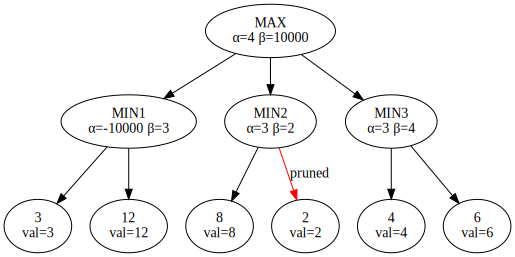

In [11]:
# Colab Notebook: Alpha-Beta Pruning Visualization
!pip install graphviz
from graphviz import Digraph
from IPython.display import display

# =============================
# Alpha-Beta Function
# =============================
def alpha_beta(node_name, depth, isMax, values, alpha, beta, graph):
    """
    Recursive Alpha-Beta pruning simulation
    node_name: name of current node
    depth: depth in tree
    isMax: True if MAX node, False if MIN node
    values: dictionary of leaf values
    alpha: current alpha
    beta: current beta
    graph: graphviz Digraph object for visualization
    """
    # If leaf node
    if node_name in values:
        graph.node(node_name, f"{node_name}\nval={values[node_name]}")
        return values[node_name]

    if isMax:
        maxEval = -10000
        graph.node(node_name, f"{node_name}\nα={alpha} β={beta}")
        for child in node_children[node_name]:
            val = alpha_beta(child, depth+1, False, values, alpha, beta, graph)
            maxEval = max(maxEval, val)
            alpha = max(alpha, maxEval)
            graph.node(node_name, f"{node_name}\nα={alpha} β={beta}")
            if beta <= alpha:
                graph.edge(node_name, child, label="pruned", color="red")
                break
            else:
                graph.edge(node_name, child)
        return maxEval
    else:
        minEval = 10000
        graph.node(node_name, f"{node_name}\nα={alpha} β={beta}")
        for child in node_children[node_name]:
            val = alpha_beta(child, depth+1, True, values, alpha, beta, graph)
            minEval = min(minEval, val)
            beta = min(beta, minEval)
            graph.node(node_name, f"{node_name}\nα={alpha} β={beta}")
            if beta <= alpha:
                graph.edge(node_name, child, label="pruned", color="red")
                break
            else:
                graph.edge(node_name, child)
        return minEval

# =============================
# Tree Structure
# =============================
# Example from your problem:
# MAX
# ├─ MIN
# │  ├─ 3
# │  └─ 12
# ├─ MIN
# │  ├─ 8
# │  └─ 2
# └─ MIN
#    ├─ 4
#    └─ 6

node_children = {
    "MAX": ["MIN1", "MIN2", "MIN3"],
    "MIN1": ["3", "12"],
    "MIN2": ["8", "2"],
    "MIN3": ["4", "6"]
}

leaf_values = {
    "3": 3,
    "12": 12,
    "8": 8,
    "2": 2,
    "4": 4,
    "6": 6
}

# =============================
# Create Graph
# =============================
graph = Digraph(format='png')
result = alpha_beta("MAX", 0, True, leaf_values, -10000, 10000, graph)

print(f"Optimal value at root (MAX): {result}")

# Display tree
display(graph)


In [12]:
# Colab Notebook: Alpha-Beta Pruning Step-by-Step Trace
!pip install pandas
import pandas as pd

# =============================
# Tree Structure Example
# =============================
# MAX
# ├─ MIN1
# │  ├─ 3
# │  └─ 12
# ├─ MIN2
# │  ├─ 8
# │  └─ 2
# └─ MIN3
#    ├─ 4
#    └─ 6

node_children = {
    "MAX": ["MIN1", "MIN2", "MIN3"],
    "MIN1": ["3", "12"],
    "MIN2": ["8", "2"],
    "MIN3": ["4", "6"]
}

leaf_values = {
    "3": 3,
    "12": 12,
    "8": 8,
    "2": 2,
    "4": 4,
    "6": 6
}

# =============================
# Step-by-step log
# =============================
trace = []
step_counter = 1

def alpha_beta_trace(node_name, isMax, alpha=-10000, beta=10000):
    global step_counter
    # If leaf node
    if node_name in leaf_values:
        trace.append({
            "Step": step_counter,
            "Node": node_name,
            "Node Type": "Leaf",
            "Alpha": alpha,
            "Beta": beta,
            "Action": f"Visit leaf → return {leaf_values[node_name]}"
        })
        step_counter += 1
        return leaf_values[node_name]

    node_type = "MAX" if isMax else "MIN"
    trace.append({
        "Step": step_counter,
        "Node": node_name,
        "Node Type": node_type,
        "Alpha": alpha,
        "Beta": beta,
        "Action": "Start processing children"
    })
    step_counter += 1

    if isMax:
        maxEval = -10000
        for child in node_children[node_name]:
            val = alpha_beta_trace(child, False, alpha, beta)
            maxEval = max(maxEval, val)
            alpha = max(alpha, maxEval)
            action = f"Update α={alpha} after visiting {child}"
            trace.append({
                "Step": step_counter,
                "Node": node_name,
                "Node Type": node_type,
                "Alpha": alpha,
                "Beta": beta,
                "Action": action
            })
            step_counter += 1
            if beta <= alpha:
                trace.append({
                    "Step": step_counter,
                    "Node": node_name,
                    "Node Type": node_type,
                    "Alpha": alpha,
                    "Beta": beta,
                    "Action": f"Prune remaining children of {node_name}"
                })
                step_counter += 1
                break
        return maxEval
    else:
        minEval = 10000
        for child in node_children[node_name]:
            val = alpha_beta_trace(child, True, alpha, beta)
            minEval = min(minEval, val)
            beta = min(beta, minEval)
            action = f"Update β={beta} after visiting {child}"
            trace.append({
                "Step": step_counter,
                "Node": node_name,
                "Node Type": node_type,
                "Alpha": alpha,
                "Beta": beta,
                "Action": action
            })
            step_counter += 1
            if beta <= alpha:
                trace.append({
                    "Step": step_counter,
                    "Node": node_name,
                    "Node Type": node_type,
                    "Alpha": alpha,
                    "Beta": beta,
                    "Action": f"Prune remaining children of {node_name}"
                })
                step_counter += 1
                break
        return minEval

# =============================
# Run Alpha-Beta Trace
# =============================
optimal_value = alpha_beta_trace("MAX", True)
print(f"Optimal value at root (MAX): {optimal_value}")

# =============================
# Display Step-by-Step Table
# =============================
df = pd.DataFrame(trace)
df


Optimal value at root (MAX): 4


,Step,Node,Node Type,Alpha,Beta,Action
0,1,MAX,MAX,-10000,10000,Start processing children
1,2,MIN1,MIN,-10000,10000,Start processing children
2,3,3,Leaf,-10000,10000,Visit leaf → return 3
3,4,MIN1,MIN,-10000,3,Update β=3 after visiting 3
4,5,12,Leaf,-10000,3,Visit leaf → return 12
5,6,MIN1,MIN,-10000,3,Update β=3 after visiting 12
6,7,MAX,MAX,3,10000,Update α=3 after visiting MIN1
7,8,MIN2,MIN,3,10000,Start processing children
8,9,8,Leaf,3,10000,Visit leaf → return 8
9,10,MIN2,MIN,3,8,Update β=8 after visiting 8


In [13]:
# Colab Notebook: Compare Node Expansions (Minimax vs Alpha-Beta)

# =============================
# Parameters
# =============================
b = 3  # Branching factor
d = 4  # Depth of tree

# =============================
# Minimax Node Count
# =============================
# Minimax explores the entire tree: nodes = b^0 + b^1 + ... + b^d
minimax_nodes = sum([b**i for i in range(d+1)])

# =============================
# Alpha-Beta Node Count (Approx)
# =============================
# Best case: Alpha-Beta reduces effective depth to d/2
alphabeta_nodes_best = sum([b**i for i in range((d//2)+1)])
# Worst case: no pruning, same as Minimax
alphabeta_nodes_worst = minimax_nodes

# =============================
# Print Results
# =============================
print("Branching factor (b):", b)
print("Depth (d):", d)
print("-------------------------------------------------")
print("Minimax total nodes explored:", minimax_nodes)
print("Alpha-Beta nodes (best case, approx):", alphabeta_nodes_best)
print("Alpha-Beta nodes (worst case):", alphabeta_nodes_worst)
print("-------------------------------------------------")
print("Conclusion:")
print("- Alpha-Beta pruning is faster than Minimax in the best case.")
print("- It prunes branches that cannot affect the final decision, reducing the number of nodes explored.")


Branching factor (b): 3
Depth (d): 4
-------------------------------------------------
Minimax total nodes explored: 121
Alpha-Beta nodes (best case, approx): 13
Alpha-Beta nodes (worst case): 121
-------------------------------------------------
Conclusion:
- Alpha-Beta pruning is faster than Minimax in the best case.
- It prunes branches that cannot affect the final decision, reducing the number of nodes explored.


In [14]:
# Colab Notebook: Alpha-Beta Pruning Trace with Step-by-Step Table
!pip install pandas
import pandas as pd

# =============================
# Tree Example
# =============================
# MAX
# ├─ MIN1
# │  ├─ 3
# │  └─ 12
# ├─ MIN2
# │  ├─ 8
# │  └─ 2
# └─ MIN3
#    ├─ 4
#    └─ 6

node_children = {
    "MAX": ["MIN1", "MIN2", "MIN3"],
    "MIN1": ["3", "12"],
    "MIN2": ["8", "2"],
    "MIN3": ["4", "6"]
}

leaf_values = {
    "3": 3,
    "12": 12,
    "8": 8,
    "2": 2,
    "4": 4,
    "6": 6
}

# =============================
# Trace Log
# =============================
trace = []
step_counter = 1

def alphabeta_trace(node, isMax, alpha=-10000, beta=10000):
    global step_counter

    # Leaf node
    if node in leaf_values:
        trace.append({
            "Step": step_counter,
            "Node": node,
            "Node Type": "Leaf",
            "Alpha": alpha,
            "Beta": beta,
            "Action": f"Return value = {leaf_values[node]}"
        })
        step_counter += 1
        return leaf_values[node]

    node_type = "MAX" if isMax else "MIN"
    value = -999 if isMax else 999

    trace.append({
        "Step": step_counter,
        "Node": node,
        "Node Type": node_type,
        "Alpha": alpha,
        "Beta": beta,
        "Action": "Start evaluating children"
    })
    step_counter += 1

    for child in node_children[node]:
        child_value = alphabeta_trace(child, not isMax, alpha, beta)
        if isMax:
            value = max(value, child_value)
            alpha = max(alpha, value)
        else:
            value = min(value, child_value)
            beta = min(beta, value)

        action = f"Update value={value}, α={alpha}, β={beta} after visiting {child}"
        trace.append({
            "Step": step_counter,
            "Node": node,
            "Node Type": node_type,
            "Alpha": alpha,
            "Beta": beta,
            "Action": action
        })
        step_counter += 1

        # Pruning check
        if beta <= alpha:
            trace.append({
                "Step": step_counter,
                "Node": node,
                "Node Type": node_type,
                "Alpha": alpha,
                "Beta": beta,
                "Action": f"Prune remaining children of {node} (β ≤ α)"
            })
            step_counter += 1
            break

    return value

# =============================
# Run Alpha-Beta Trace
# =============================
optimal_value = alphabeta_trace("MAX", True)
print(f"Optimal value at root (MAX): {optimal_value}")

# =============================
# Display Step-by-Step Table
# =============================
df = pd.DataFrame(trace)
df


Optimal value at root (MAX): 4


,Step,Node,Node Type,Alpha,Beta,Action
0,1,MAX,MAX,-10000,10000,Start evaluating children
1,2,MIN1,MIN,-10000,10000,Start evaluating children
2,3,3,Leaf,-10000,10000,Return value = 3
3,4,MIN1,MIN,-10000,3,"Update value=3, α=-10000, β=3 after visiting 3"
4,5,12,Leaf,-10000,3,Return value = 12
5,6,MIN1,MIN,-10000,3,"Update value=3, α=-10000, β=3 after visiting 12"
6,7,MAX,MAX,3,10000,"Update value=3, α=3, β=10000 after visiting MIN1"
7,8,MIN2,MIN,3,10000,Start evaluating children
8,9,8,Leaf,3,10000,Return value = 8
9,10,MIN2,MIN,3,8,"Update value=8, α=3, β=8 after visiting 8"
